# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [56]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
def one_sample_ttest(sample, popmean, alpha):
    # Visualize sample distribution for normality
    sns.histplot(sample, kde=True)
    plt.title("Sample Distribution")
    plt.axvline(np.mean(sample), color='red', linestyle='--', label='Sample Mean')
    plt.axvline(popmean, color='green', linestyle='--', label='Population Mean')
    plt.legend()
    plt.show()

    # Sample statistics
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Use ddof=1 for sample standard deviation (unbiased estimate)
    n = len(sample)
    
    # Degrees of freedom
    df = n - 1

    # Calculate the critical t-value
    critical_t = st.t.ppf(1 - alpha/2, df)

    # Calculate the t-statistic
    t_stat = (sample_mean - popmean) / (sample_std / np.sqrt(n))

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - st.t.cdf(abs(t_stat), df))

    # Print the results
    print(f"Sample Mean: {sample_mean}")
    print(f"Sample Standard Deviation: {sample_std}")
    print(f"Degrees of Freedom: {df}")
    print(f"T-Statistic: {t_stat}")
    print(f"Critical T-Value: {critical_t}")
    print(f"P-Value: {p_value}")
    
    # Check if the results are statistically significant
    if p_value < alpha:
        print("The result is statistically significant (reject the null hypothesis).")
    else:
        print("The result is not statistically significant (fail to reject the null hypothesis).")

    return t_stat, critical_t, p_value

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [58]:
sample= np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

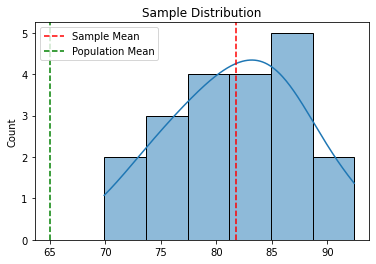

In [59]:
# Visualize to normalize 
sns.histplot(sample, kde=True)
plt.title("Sample Distribution")
plt.axvline(np.mean(sample), color='red', linestyle='--', label='Sample Mean')
plt.axvline(popmean, color='green', linestyle='--', label='Population Mean')
plt.legend()
plt.show()

In [60]:
# population statistics
popmean= 65

In [61]:
# Sample statistics
sample_mean= np.mean(sample)
sample_std= np.std(sample, ddof=1)
n= len(sample)
print(sample_mean)
print(sample_std)
print(n)

81.80000000000001
5.9216818379134235
20


In [62]:
# Degrees of Freedom
df= n-1
print(df)

# Alpha Level
alpha= 0.05
print(alpha)

19
0.05


In [63]:
# Calculate the critical value
critical_t= st.t.ppf(1-alpha/2, df)
critical_t

2.093024054408263

In [64]:
# Calculate the t-statistic
t_stat= (sample_mean-popmean)/(sample_std/np.sqrt(n))
t_stat 

12.687592157174493

In [65]:
# Calculate the two tailored p-value
p_value= 2*(1-st.t.cdf(abs(t_stat), df))
p_value

1.0053358145967195e-10

In [66]:
# Print the results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Degrees of Freedom: {df}")
print(f"T-Statistic: {t_stat}")
print(f"Critical T-Value: {critical_t}")
print(f"P-Value: {p_value}")

Sample Mean: 81.80000000000001
Sample Standard Deviation: 5.9216818379134235
Degrees of Freedom: 19
T-Statistic: 12.687592157174493
Critical T-Value: 2.093024054408263
P-Value: 1.0053358145967195e-10


In [72]:
# Check if the results are statistically significant
if p_value < alpha:
    print("The result is statistically significant (reject the null hypothesis).")
else:
        print("The result is not statistically significant (fail to reject the null hypothesis).")

The result is statistically significant (reject the null hypothesis).


In [73]:
t_stat, critical_t, p_value

(12.687592157174493, 2.093024054408263, 1.0053358145967195e-10)

In [75]:
# Re-running the code after environment reset

import numpy as np
from scipy import stats

# Corrected sample data (replaced 90.9 with 80.9)
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                   78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

# Population mean to compare against
popmean = 65

# Alpha level for the test
alpha = 0.05

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample, popmean)

# Critical t-value for two-tailed test (df = len(sample) - 1)
critical_t = stats.t.ppf(1 - alpha / 2, df=len(sample) - 1)

# Check if the results are statistically significant
is_significant = p_value < alpha

t_stat, p_value, critical_t, is_significant


(13.202088288314906, 5.083361606682268e-11, 2.093024054408263, True)

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 